In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the processed dataset
df = pd.read_csv("processed_dataset.csv")

In [3]:
# Step 2: Split Data into Training and Testing Sets
X = df[['Typing_Speed', 'Fatigue_Index', 'Cognitive_Load', 'Typing_Speed_HMM', 'Cognitive_Load_HMM', 'Fatigue_Index_HMM']]
y = df['DeviceId']  # Assuming DeviceId represents unique users for authentication
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Step 3: Train Multiple Machine Learning Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,50), max_iter=500, random_state=42)
}


In [5]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.7661
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       985
           1       0.68      0.71      0.69       588

    accuracy                           0.77      1573
   macro avg       0.75      0.75      0.75      1573
weighted avg       0.77      0.77      0.77      1573

Random Forest Accuracy: 0.8601
              precision    recall  f1-score   support

           0       0.85      0.95      0.89       985
           1       0.89      0.72      0.79       588

    accuracy                           0.86      1573
   macro avg       0.87      0.83      0.84      1573
weighted avg       0.86      0.86      0.86      1573

Support Vector Machine Accuracy: 0.7648
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       985
           1       0.68      0.70      0.69       588

    accuracy                           0.76      1573
   macro avg       0

In [6]:
# Step 4: Display Model Comparison
print("Model Comparison:")
print(results)

Model Comparison:
{'Logistic Regression': 0.7660521296884933, 'Random Forest': 0.8601398601398601, 'Support Vector Machine': 0.764780673871583, 'Neural Network': 0.768595041322314}


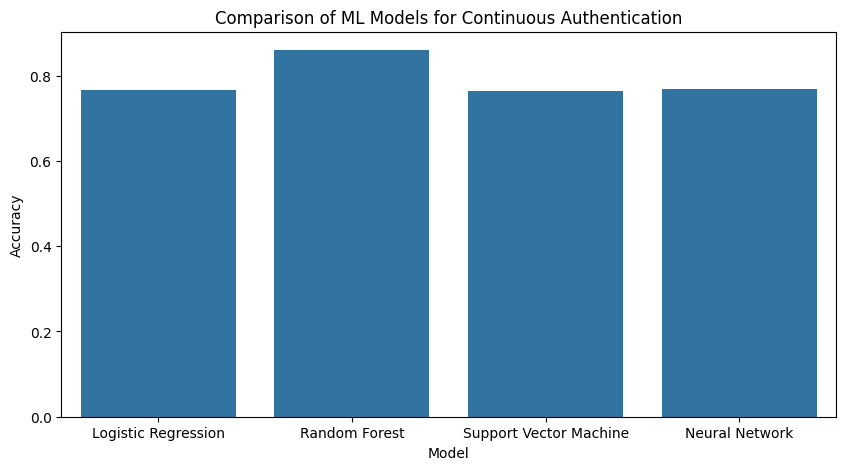

In [7]:
# Step 5: Plot Model Performance
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of ML Models for Continuous Authentication")
plt.show()